In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
raw_img = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/"

imgfiles = next(os.walk(raw_img))[2]
print(len(imgfiles))

30000


Images in jpg format <br />
Annotations in png format

Image shape :  (1024, 1024, 3)


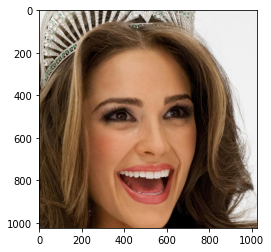

In [11]:
sample_path = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/0.jpg"

sample_img = cv2.imread(sample_path)
sample_img_inp = cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR)
print('Image shape : ', np.shape(sample_img_inp))

plt.imshow(sample_img_inp)

Annotation Categories:
* hair
* left brow
* right brow
* left eye
* right eye
* nose
* lower lip
* upper lip
* neck
* skin
* mouth
* left ear
* right ear
* cloth

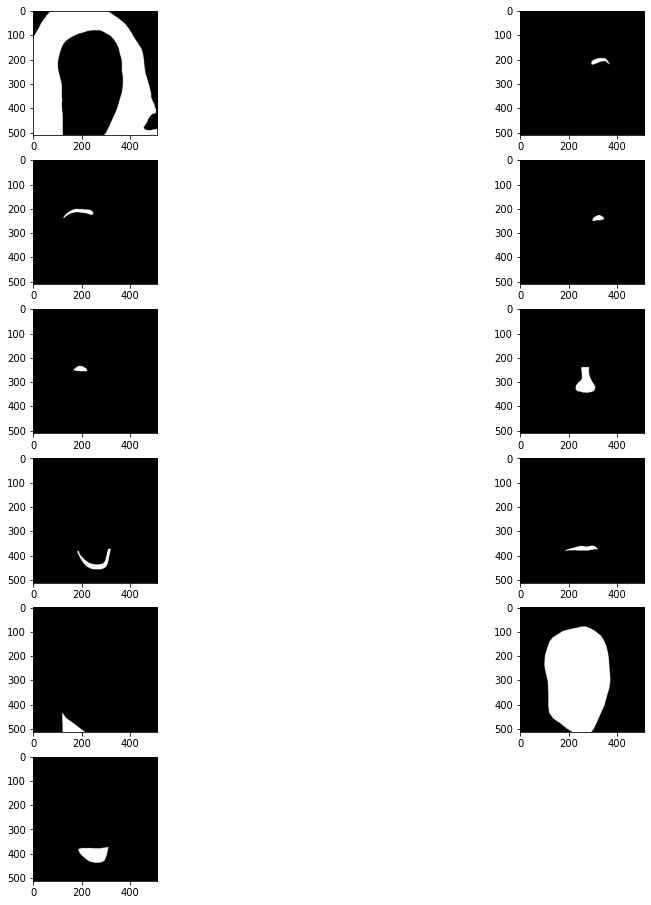

In [26]:
sample_path_ann = "../data/raw/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/00000_"
categories = [
    'hair.png',
    'l_brow.png',
    'r_brow.png',
    'l_eye.png',
    'r_eye.png',
    'nose.png',
    'l_lip.png',
    'u_lip.png',
    'neck.png',
    'skin.png',
    'mouth.png',
    'l_ear.png',
    'r_ear.png',
    'cloth.png'
]
fig = plt.figure(figsize=(16, 16))
rows = 6
columns = 2
i = 1

for cat in categories:
    path = sample_path_ann + cat
    if not os.path.exists(path):
        continue
    sample_img = cv2.imread(path)
    fig.add_subplot(rows, columns, i)
    i = i + 1
    plt.imshow(sample_img, 'gray')
plt.show()

In [27]:
print("Annotation shape : ", np.shape(sample_img))

Annotation shape :  (512, 512, 3)


Annote shape :  (512, 512, 3)


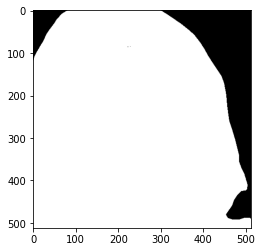

In [34]:
def get_combined_ann(root, categories):
    combined_ann = np.zeros(np.shape(sample_img)).astype(np.uint8)
    for cat in categories:
        path = root + cat
        if not os.path.exists(path):
            continue
        img = cv2.imread(path)
        combined_ann = cv2.add(combined_ann, img)
    return combined_ann

combined_ann = get_combined_ann(sample_path_ann, categories)
print("Annote shape : ", np.shape(combined_ann))
plt.imshow(combined_ann)

Combining masks with original image gives the portrait cut out from the background

Since input in of size 1024 x 1024 and mask of size 512 x 512, the input image is downsized to size of mask

(512, 512, 3)


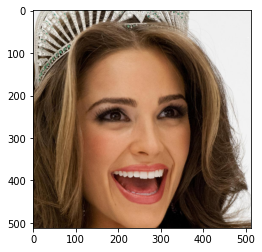

In [29]:
sample_img_inp = cv2.resize(sample_img_inp, (512, 512))
print(np.shape(sample_img_inp))
sample_img_inp.astype(np.uint8)

imshow(sample_img_inp)

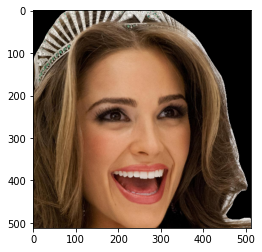

In [31]:
fin_image = cv2.bitwise_and(sample_img_inp, combined_ann)

plt.imshow(fin_image)

Image shape :  (512, 512, 3)


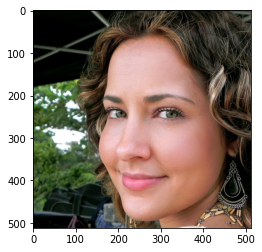

In [38]:
sample_path = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/2.jpg"
img = cv2.imread(sample_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.resize(img, (512, 512))
print("Image shape : ", np.shape(img))
plt.imshow(img)

Annote shape :  (512, 512, 3)


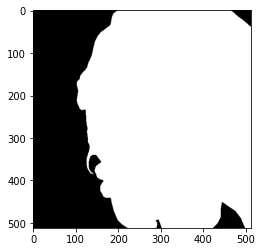

In [39]:
sample_path_ann = "../data/raw/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/00002_"

combined_ann = get_combined_ann(sample_path_ann, categories)
print("Annote shape : ", np.shape(combined_ann))
plt.imshow(combined_ann)

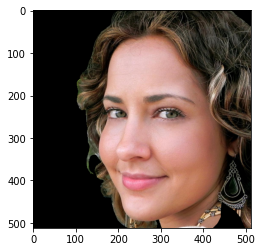

In [41]:
fin_image = cv2.bitwise_and(img, combined_ann)

plt.imshow(fin_image)

Image shape :  (1024, 1024, 3)
Small image shape :  (512, 512, 3)


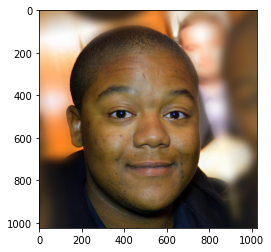

In [48]:
sample_path = "../data/raw/CelebAMask-HQ/CelebA-HQ-img/10.jpg"
img = cv2.imread(sample_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_small = cv2.resize(img, (512, 512))
print("Image shape : ", np.shape(img))
print("Small image shape : ", np.shape(img_small))
plt.imshow(img)

Annote shape :  (512, 512, 3)
Annote(large) shape :  (1024, 1024, 3)


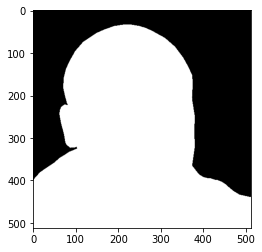

In [49]:
sample_path_ann = "../data/raw/CelebAMask-HQ/CelebAMask-HQ-mask-anno/0/00010_"

combined_ann = get_combined_ann(sample_path_ann, categories)
combined_ann_large = cv2.resize(combined_ann, (1024, 1024))
print("Annote shape : ", np.shape(combined_ann))
print("Annote(large) shape : ", np.shape(combined_ann_large))
plt.imshow(combined_ann)

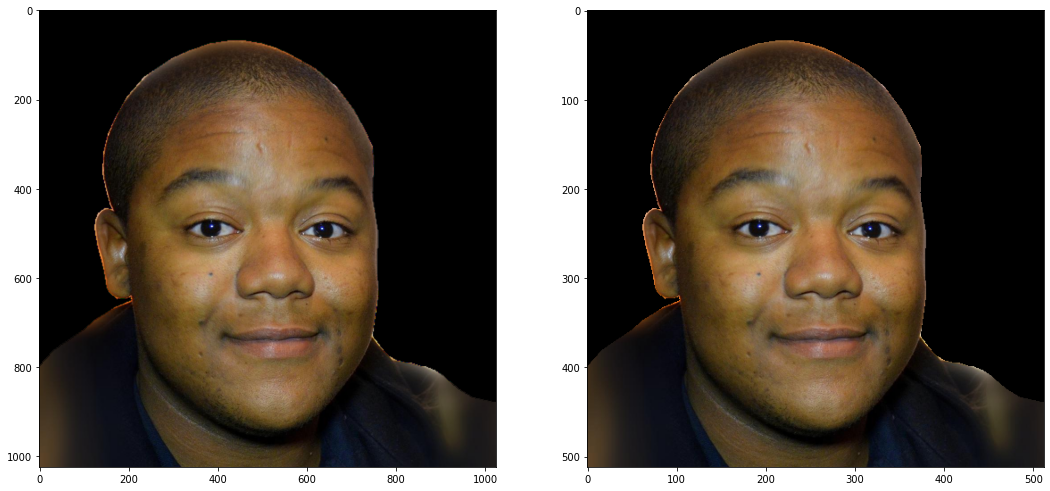

In [54]:
fin_image_large = cv2.bitwise_and(img, combined_ann_large)
fin_image_small = cv2.bitwise_and(img_small, combined_ann)

fig = plt.figure(figsize=(18, 18))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(fin_image_large)

fig.add_subplot(rows, columns, 2)
plt.imshow(fin_image_small)

plt.show()

Since input images are in 1024x1024 dimension and masks in 512x512. Since, no noticable loss in conversion of either mask or image to the other size, hence convert all raw images to size 512x512 and combine all respective masks. Also, collect all masks under single folder as opposed to the bucketized folder structure givrn for the annotated masks.

In [56]:
print("{:05d}".format(2))

00002


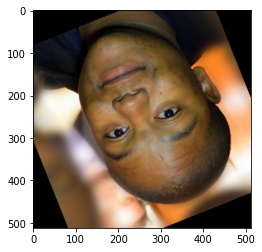

In [66]:
import torchvision
import random
import torch
from PIL import Image
img = Image.fromarray(img_small)
mask = Image.fromarray(combined_ann)
transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.RandomRotation(45),
    torchvision.transforms.RandomVerticalFlip(p=0.5)
])
seed = np.random.randint(2147483647)
random.seed(seed)
img = transform(img)
mask = transform(mask)
plt.imshow(img)

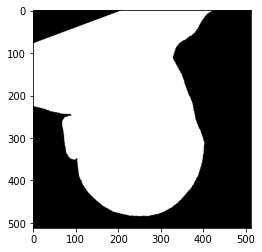

In [67]:
plt.imshow(mask)